<a href="https://colab.research.google.com/github/debi201326/AAI_Practical/blob/main/AAI_Prac_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical 9:  Develop visual explanations for model predictions using techniques such as saliency maps or LIME - CNN is required.

In [1]:
import cv2
import imutils
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mlp
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array , load_img
from tensorflow.keras.applications import resnet50 , VGG16 , imagenet_utils

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
Labrador_retriever : 66.863495


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_23']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


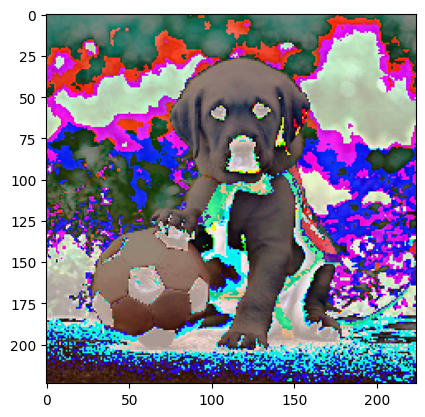

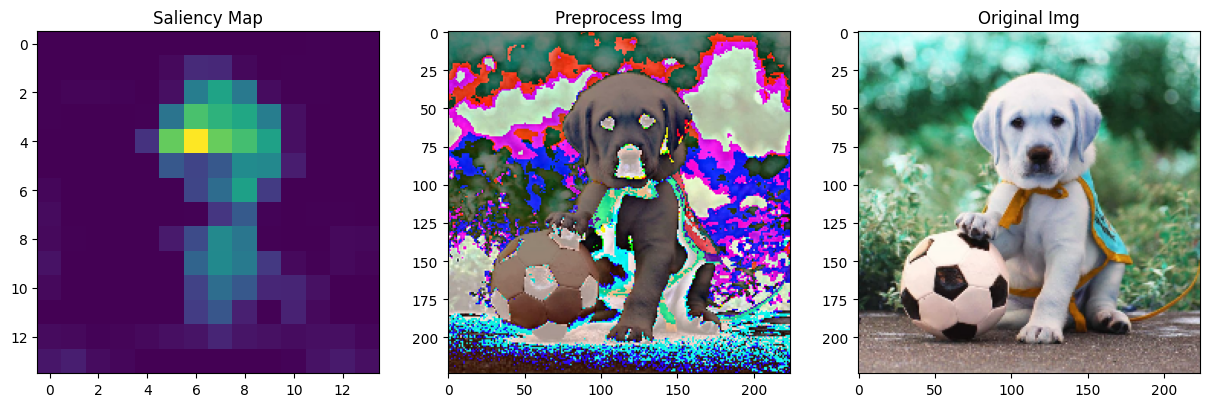

In [7]:
model = VGG16(weights = "imagenet")
img = cv2.imread('images.jpg')
img_resize = cv2.resize(img , (224,224))
plt.imshow(img_resize)

img = load_img("images.jpg" , target_size=(224,224))
img = img_to_array(img)
img = np.expand_dims(img , axis=0)
img = imagenet_utils.preprocess_input(img)
plt.imshow(img[0].astype('uint8'))

pred = model.predict(img)

decod = imagenet_utils.decode_predictions(pred, top=5)
(img_id , lable , prob ) = decod[0][0]
print(lable ,":", prob*100)

gradModel = Model(inputs=[model.inputs], outputs=
[model.get_layer('block5_conv3').output, model.output])
with tf.GradientTape() as tap:
    input = tf.cast(img , tf.float32)
    (convOutputs, predictions) = gradModel(input)
    pred_index = tf.argmax(pred[0])
    loss = predictions[:,pred_index]

grads = tap.gradient(loss, convOutputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

last_conv_layer_output = convOutputs[0]
Saliency_Maps = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
Saliency_Maps = tf.squeeze(Saliency_Maps)
Saliency_Maps = tf.maximum(Saliency_Maps, 0) / tf.math.reduce_max(Saliency_Maps)
Saliency_Maps.numpy()
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Saliency Map')
plt.imshow(Saliency_Maps)
plt.subplot(132)
plt.title('Preprocess Img')
plt.imshow(img[0].astype('uint8'))
plt.subplot(133)
plt.title('Original Img')
plt.imshow(img_resize)
